# Bearing Failure Prediction - Exploratory Data Analysis

In [2]:
import pandas as pd
import glob
import numpy as np
import os

#visualization library for creating pretty graphs and plots
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# use your paths
path1 = r'C:/Users/michal.filipiak/Desktop/PW/IML/1st_test'
path2 = r'C:/Users/michal.filipiak/Desktop/PW/IML/2nd_test'
path3 = r'C:/Users/michal.filipiak/Desktop/PW/IML/3rd_test'

#we are taking every nth row of each file for performance reasons
def skip_row(x, n):
    if x % n == 0:
        return False
    return True

def read_file(path, n):
    li = []
    time = 0
    files = glob.glob(path + "/*")
    for filename in files:
        df = pd.read_csv(filename, index_col=None, header=None, sep='\t', skiprows = lambda x:skip_row(x, n))
        df['Time'] = time
        time = time + 10
        li.append(df)
    return li

data1 = pd.concat(read_file(path1, 45), ignore_index=True)
data1.columns = ['Bearing 1 x', 'Bearing 1 y', 'Bearing 2 x', 'Bearing 2 y',
                 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y',
                 'Time']

data2 = pd.concat(read_file(path2, 20), ignore_index=True)
data2.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4',  'Time']
    
data3 = pd.concat(read_file(path3, 130), ignore_index=True)
data3.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4',  'Time']

## Data sets preview

In [4]:
data1

,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y,Time
0,-0.115,-0.027,0.044,-0.073,-0.137,-0.032,-0.129,-0.181,0
1,-0.132,-0.024,-0.115,-0.063,-0.007,-0.149,-0.095,-0.161,0
2,-0.125,-0.178,-0.291,-0.186,0.024,-0.398,-0.037,-0.120,0
3,-0.095,-0.146,-0.229,-0.068,-0.085,-0.168,-0.042,-0.103,0
4,-0.073,-0.002,0.005,-0.117,-0.176,-0.171,-0.144,-0.083,0
...,...,...,...,...,...,...,...,...,...
963523,-0.220,-0.164,-0.171,-0.427,0.347,0.193,-0.330,-0.081,21120
963524,-0.159,0.000,-0.066,-0.181,0.518,0.176,-0.017,-0.049,21120
963525,0.085,-0.188,-0.210,-0.012,0.457,0.081,-0.349,-0.176,21120
963526,-0.032,-0.107,-0.100,0.181,0.303,-0.222,0.105,-0.137,21120


In [5]:
data2

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Time
0,-0.049,-0.071,-0.132,-0.010,0
1,-0.037,0.017,-0.044,0.032,0
2,-0.002,0.002,-0.159,-0.002,0
3,0.010,-0.054,0.166,-0.066,0
4,-0.056,-0.081,-0.088,-0.002,0
...,...,...,...,...,...
1007611,-0.002,0.000,0.000,-0.002,9830
1007612,0.000,0.000,0.000,-0.002,9830
1007613,-0.002,0.000,0.000,-0.005,9830
1007614,-0.002,-0.002,-0.002,-0.005,9830


In [9]:
data3

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Time
0,0.034,0.264,0.039,-0.046,0
1,0.044,-0.066,-0.054,0.122,0
2,0.046,-0.046,-0.115,0.029,0
3,-0.059,0.281,0.010,-0.139,0
4,0.022,0.049,0.015,0.015,0
...,...,...,...,...,...
999187,0.000,0.002,0.005,0.000,63230
999188,0.002,0.005,0.005,0.000,63230
999189,0.000,0.002,0.005,0.000,63230
999190,0.000,0.002,0.005,0.000,63230


Our data sets consists of measurements made during 3 separate experiments.
<br /><br /> 
The first data set has 8 columns with data from accelerometers - 2 for each axis of one of 4 bearings. The ninth column represents time after start of the experiment given in minutes, and was added manually - the data about time was stored in each filename.
<br/> 
The second and third data sets have similar structure, but this time we only have one measurement per bearing as well as a concatenated time column.
<br /><br />
The observations were taken in very specific way - every 10 minutes, a vibration signal snapshot was collected, with a sampling rate of 20kHz. This means every 10 minutes, during a 1 second period, 20480 data points were added to the set. For performance reasons we are sampling the data from each file in regular intervals to obtain around 1000000 rows in each set.

In [10]:
data1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963528 entries, 0 to 963527
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Bearing 1 x  963528 non-null  float64
 1   Bearing 1 y  963528 non-null  float64
 2   Bearing 2 x  963528 non-null  float64
 3   Bearing 2 y  963528 non-null  float64
 4   Bearing 3 x  963528 non-null  float64
 5   Bearing 3 y  963528 non-null  float64
 6   Bearing 4 x  963528 non-null  float64
 7   Bearing 4 y  963528 non-null  float64
 8   Time         963528 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 66.2 MB


All measurements are float numbers and the time column is given as an integer - multiplicity of 10. The data set does not have any null or NaN values.

## Basic Statistical Measures

In [11]:
data1.describe()

,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y,Time
count,963528.000000,963528.000000,963528.000000,963528.000000,963528.000000,963528.000000,963528.000000,963528.000000,963528.000000
mean,-0.116511,-0.116144,-0.116187,-0.116015,-0.113238,-0.113203,-0.113313,-0.113116,10560.000000
std,0.099200,0.089477,0.094807,0.078643,0.118351,0.121794,0.097091,0.099436,6099.708076
min,-0.896000,-0.999000,-0.823000,-0.686000,-4.407000,-2.234000,-3.447000,-2.856000,0.000000
25%,-0.178000,-0.173000,-0.178000,-0.166000,-0.188000,-0.190000,-0.166000,-0.168000,5280.000000
50%,-0.117000,-0.117000,-0.115000,-0.115000,-0.112000,-0.112000,-0.112000,-0.112000,10560.000000
75%,-0.054000,-0.059000,-0.054000,-0.063000,-0.039000,-0.037000,-0.061000,-0.059000,15840.000000
max,0.579000,0.745000,0.544000,0.417000,4.998000,3.208000,3.938000,1.689000,21120.000000


Since maximum and minimum measurements differ significantly from the quartiles, there is a good chance of outliers in the data set. Measurements for each bearing seem to have their own characteristics and follow separate patterns, which we will explore later. 

## Distributions

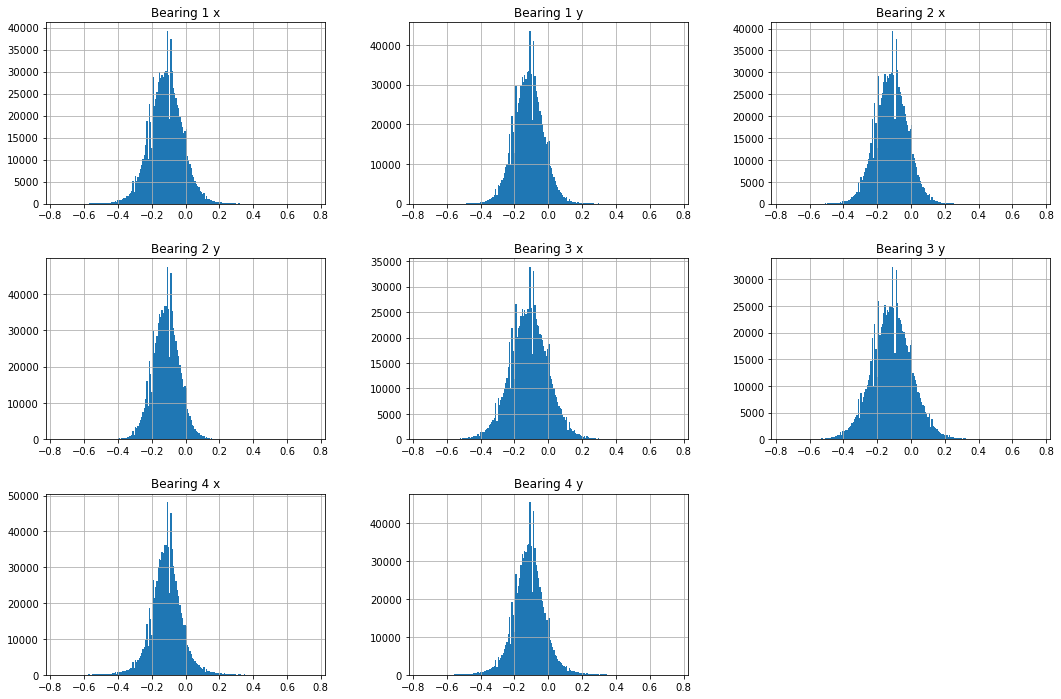

In [12]:
data1.hist(column = ['Bearing 1 x', 'Bearing 1 y', 'Bearing 2 x', 'Bearing 2 y', 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y'], range=[-0.75, 0.75], bins=200, figsize=(18,12))
plt.show() 

As we can see, the measurements approximately follow the normal leptokurtic distribution with no visible skewness.
<br/> 
There are however significant spikes around the midpoint of each histogram.

## Outliers

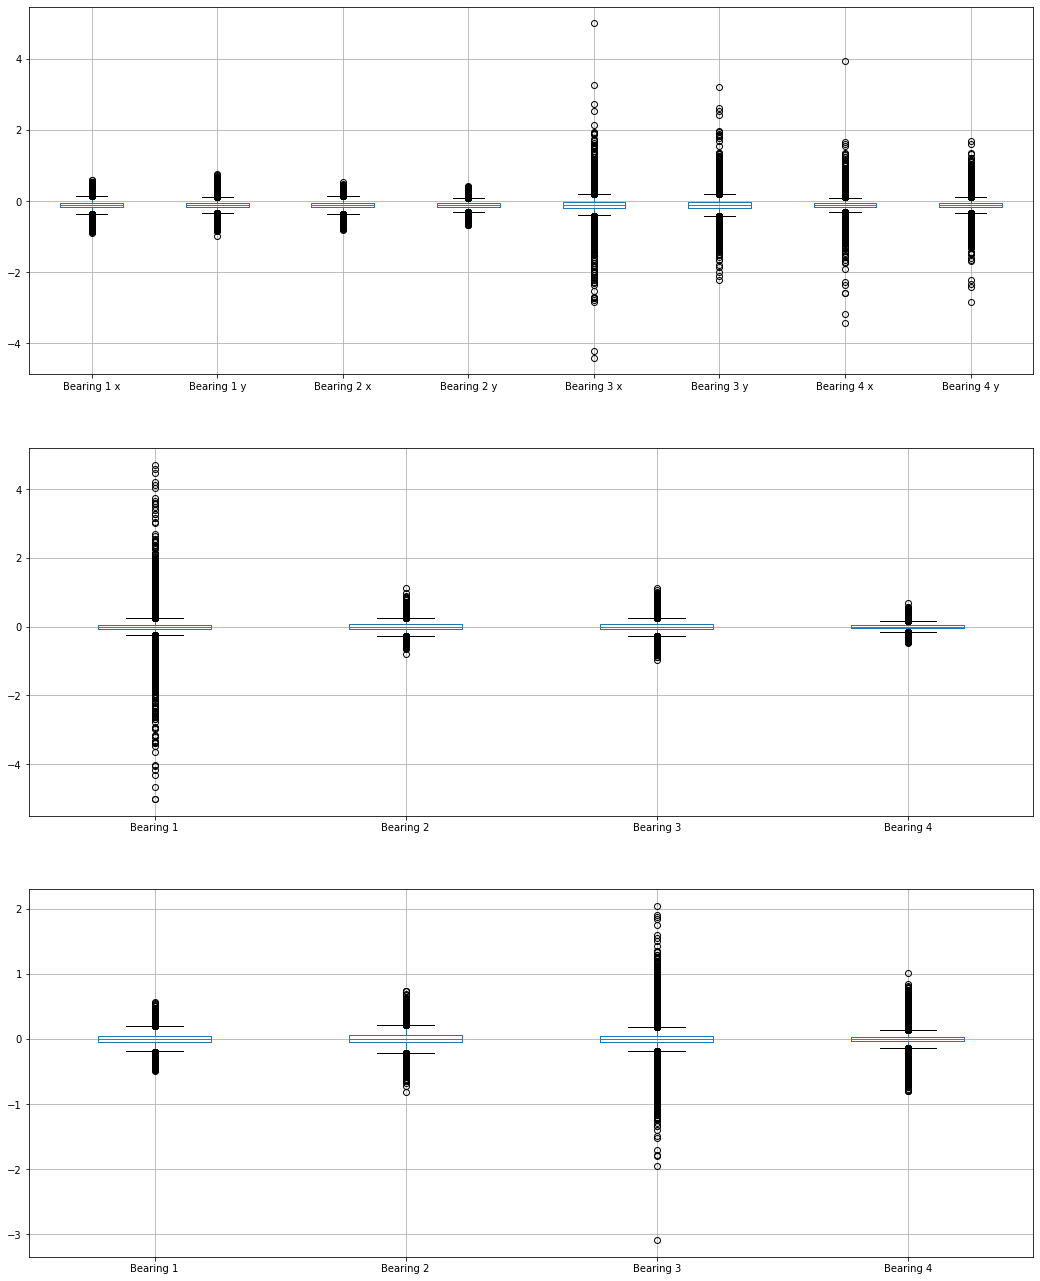

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(18,23), squeeze=False)

data1.boxplot( column = ['Bearing 1 x', 'Bearing 1 y', 'Bearing 2 x', 'Bearing 2 y', 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y'], ax=ax[0,0])
data2.boxplot( column = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4'], ax=ax[1,0])
data3.boxplot( column = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4'], ax=ax[2,0])

plt.show()

## Correlation between variables

In [14]:
def makeCorrelationplot(xcol,ycol,df,toPaint):
    df.plot(x=xcol,y=ycol,kind="scatter",color='lightcoral', marker='D',ax=toPaint)
    xvec = df[xcol]
    yvec = df[ycol]
    m, b = np.polyfit(xvec, yvec, 1)

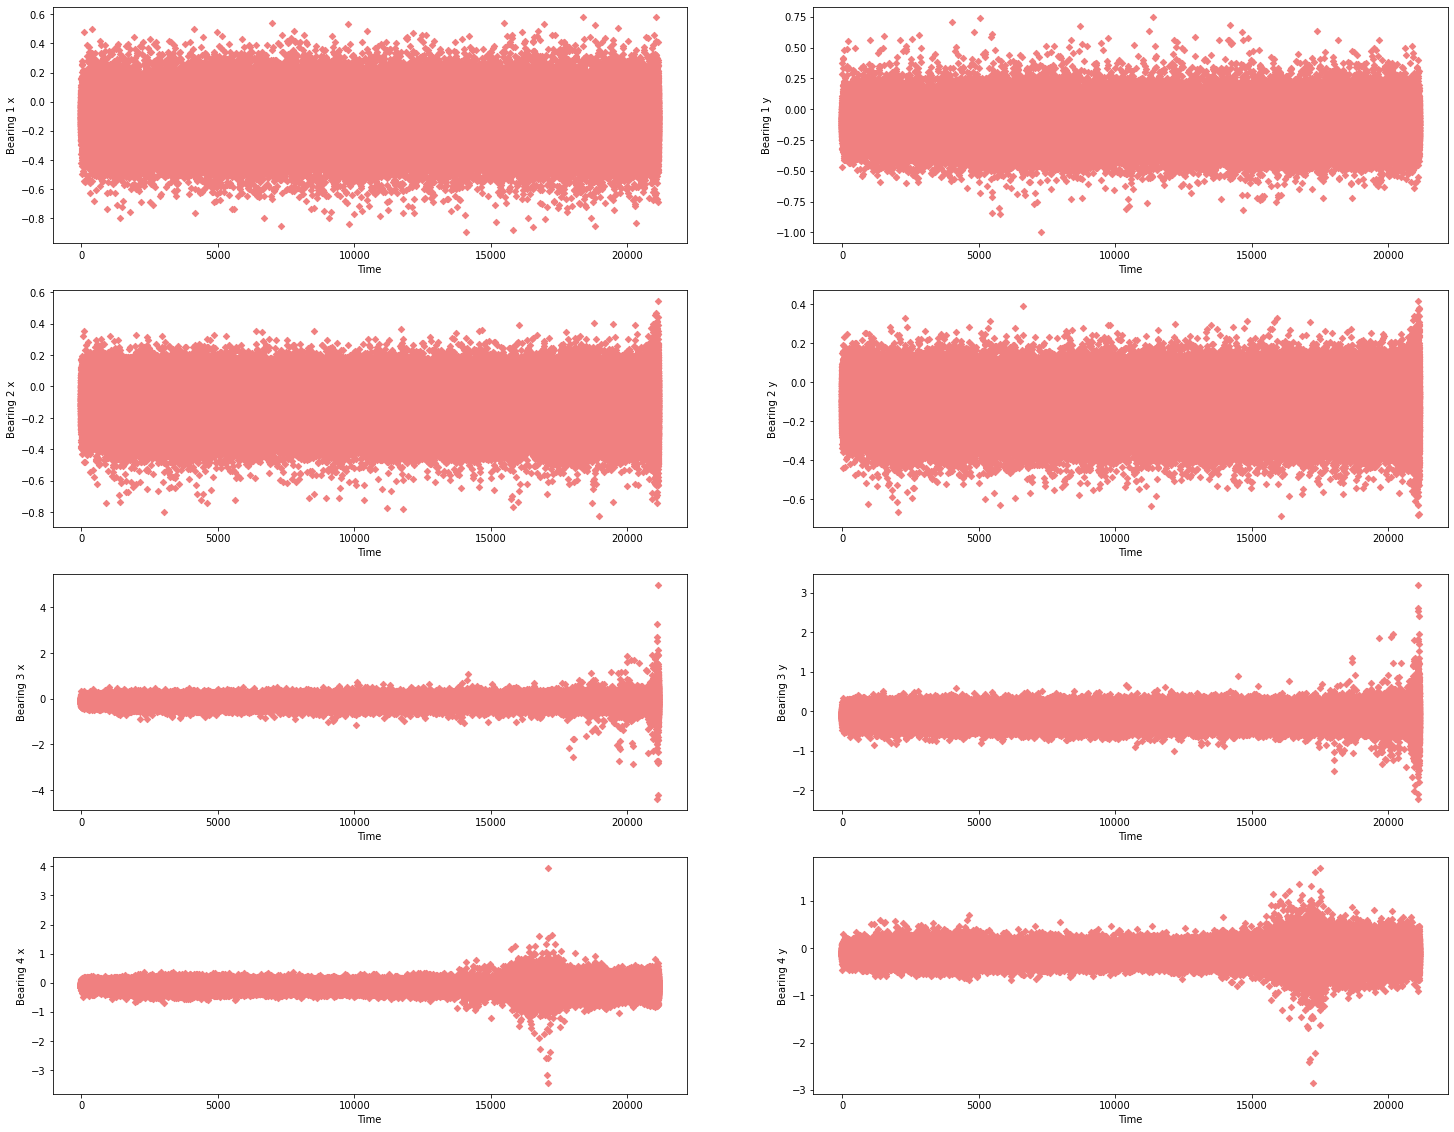

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(25,20), squeeze=False)
makeCorrelationplot("Time","Bearing 1 x", data1, ax[0,0])
makeCorrelationplot("Time","Bearing 1 y", data1, ax[0,1])
makeCorrelationplot("Time","Bearing 2 x", data1, ax[1,0])
makeCorrelationplot("Time","Bearing 2 y", data1, ax[1,1])

makeCorrelationplot("Time","Bearing 3 x", data1, ax[2,0])
makeCorrelationplot("Time","Bearing 3 y", data1, ax[2,1])
makeCorrelationplot("Time","Bearing 4 x", data1, ax[3,0])
makeCorrelationplot("Time","Bearing 4 y", data1, ax[3,1])


plt.show()

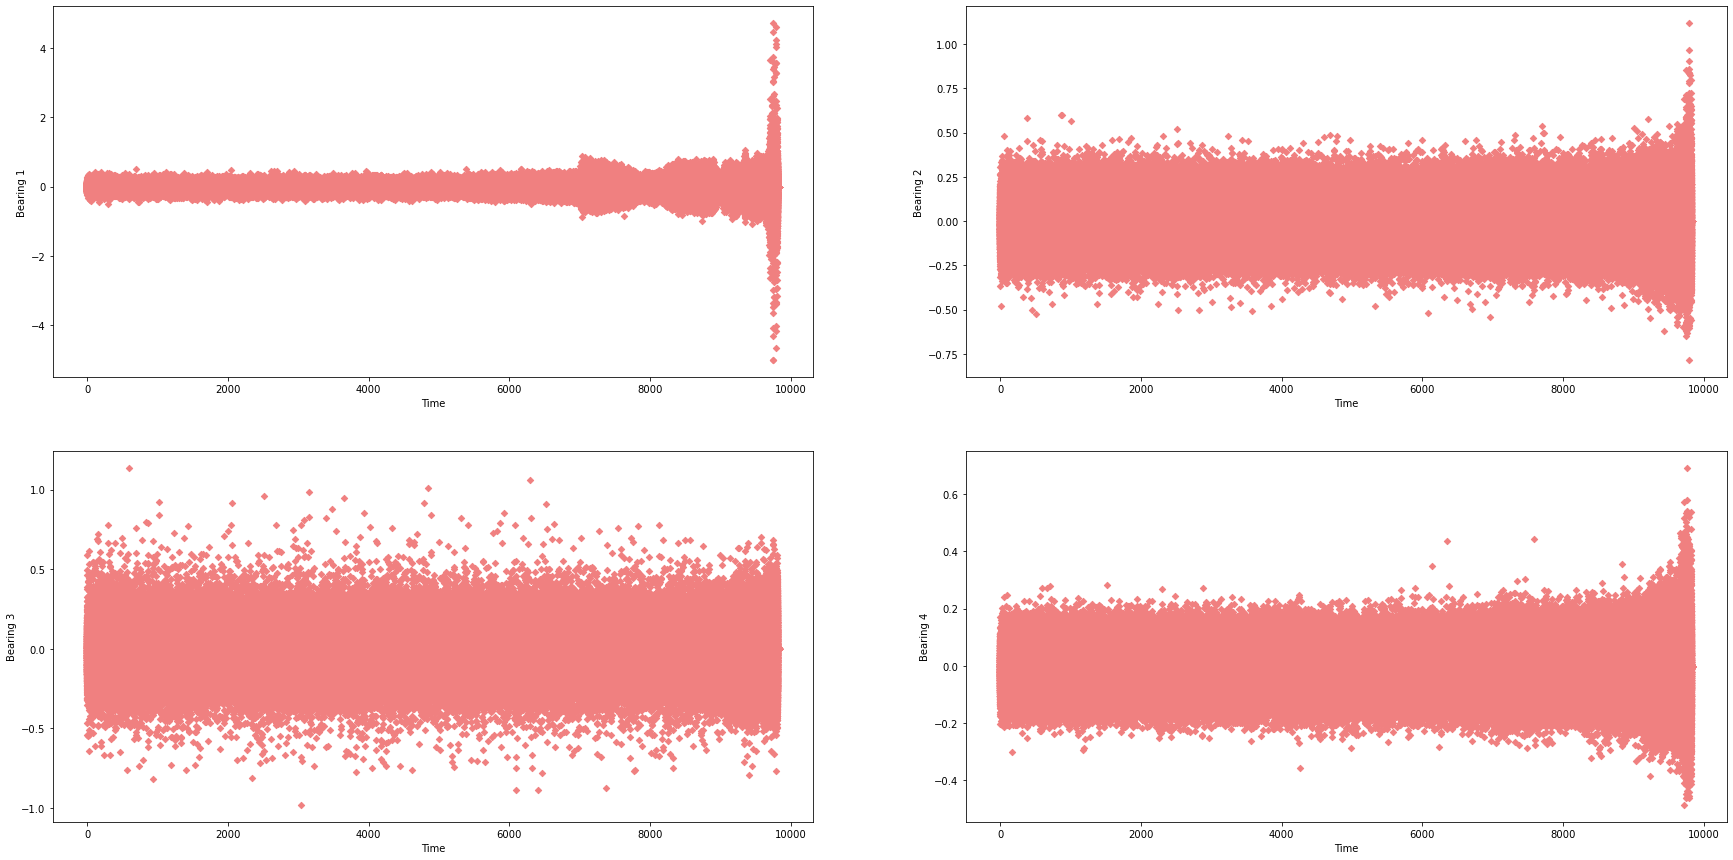

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(30,15), squeeze=False)
makeCorrelationplot("Time","Bearing 1", data2, ax[0,0])
makeCorrelationplot("Time","Bearing 2", data2, ax[0,1])
makeCorrelationplot("Time","Bearing 3", data2, ax[1,0])
makeCorrelationplot("Time","Bearing 4", data2, ax[1,1])

plt.show()

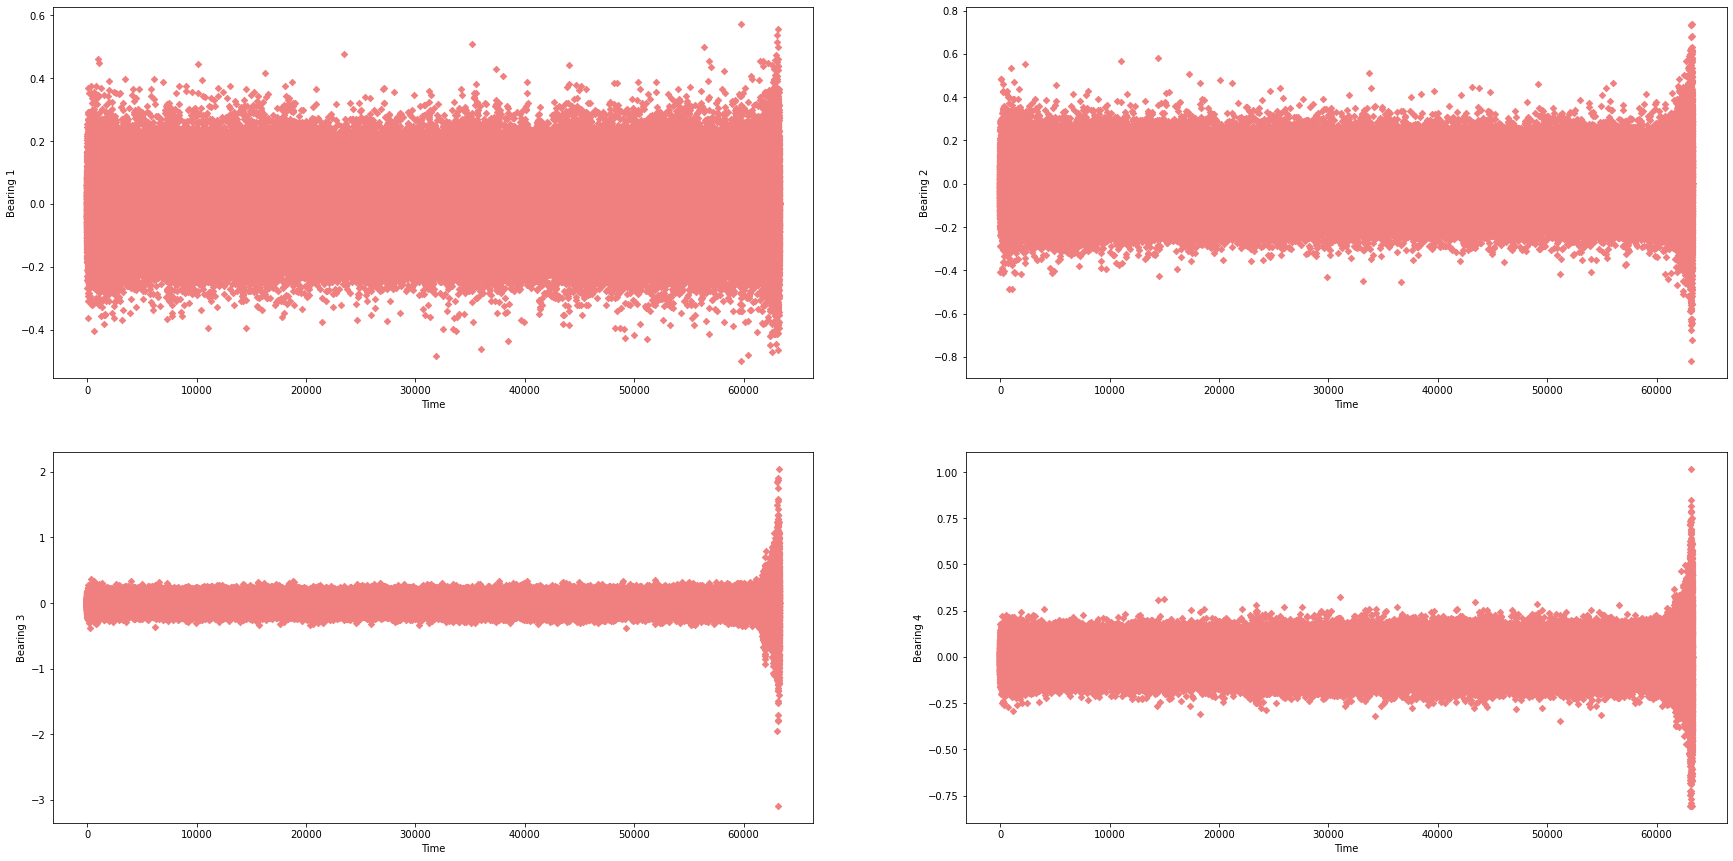

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(30,15), squeeze=False)
makeCorrelationplot("Time","Bearing 1", data3, ax[0,0])
makeCorrelationplot("Time","Bearing 2", data3, ax[0,1])
makeCorrelationplot("Time","Bearing 3", data3, ax[1,0])
makeCorrelationplot("Time","Bearing 4", data3, ax[1,1])

plt.show()

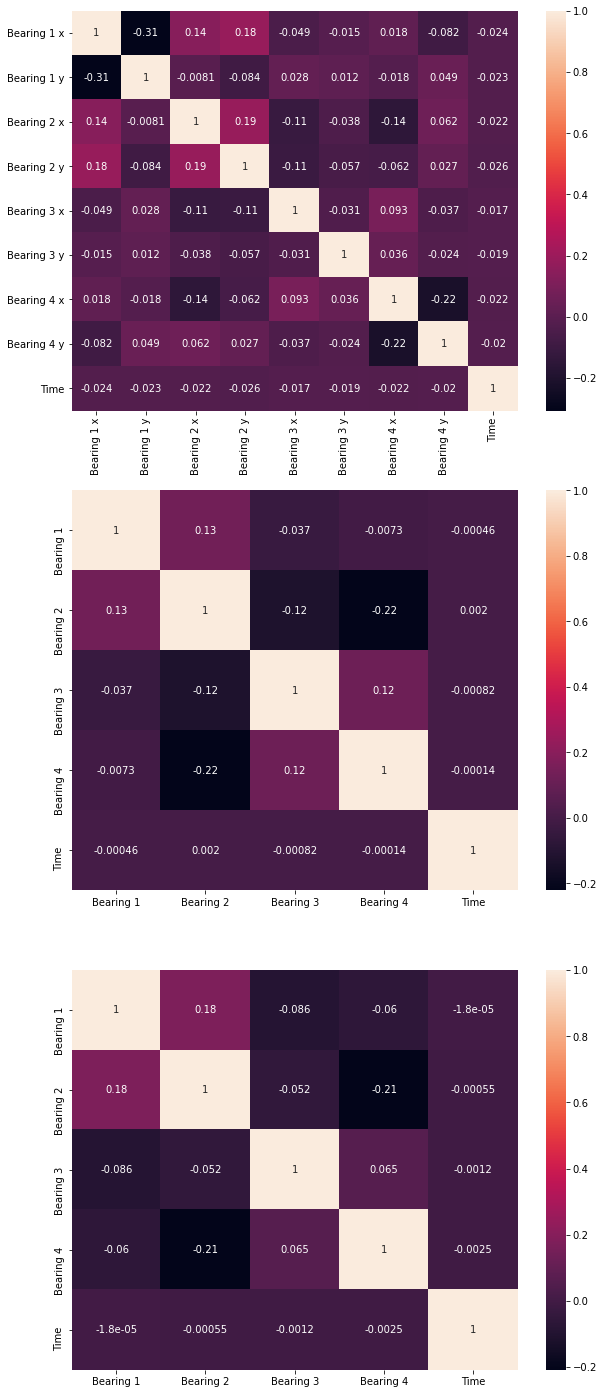

In [35]:
fig, ax = plt.subplots(3, 1, figsize=(10,25), squeeze=False)

sns.heatmap(data1.corr(), annot=True, ax=ax[0,0])
sns.heatmap(data2.corr(), annot=True, ax=ax[1,0])
sns.heatmap(data3.corr(), annot=True, ax=ax[2,0])

plt.show()

Dark shades represent a negative correlation, while lighter shades represent a positive correlation. We notice that some columns are more strongly correlated than others. For example in the first dataset 'Bearing 1x' and 'Bearing 1y' have negative correlation, which indicates the two variables move in opposite directions. 

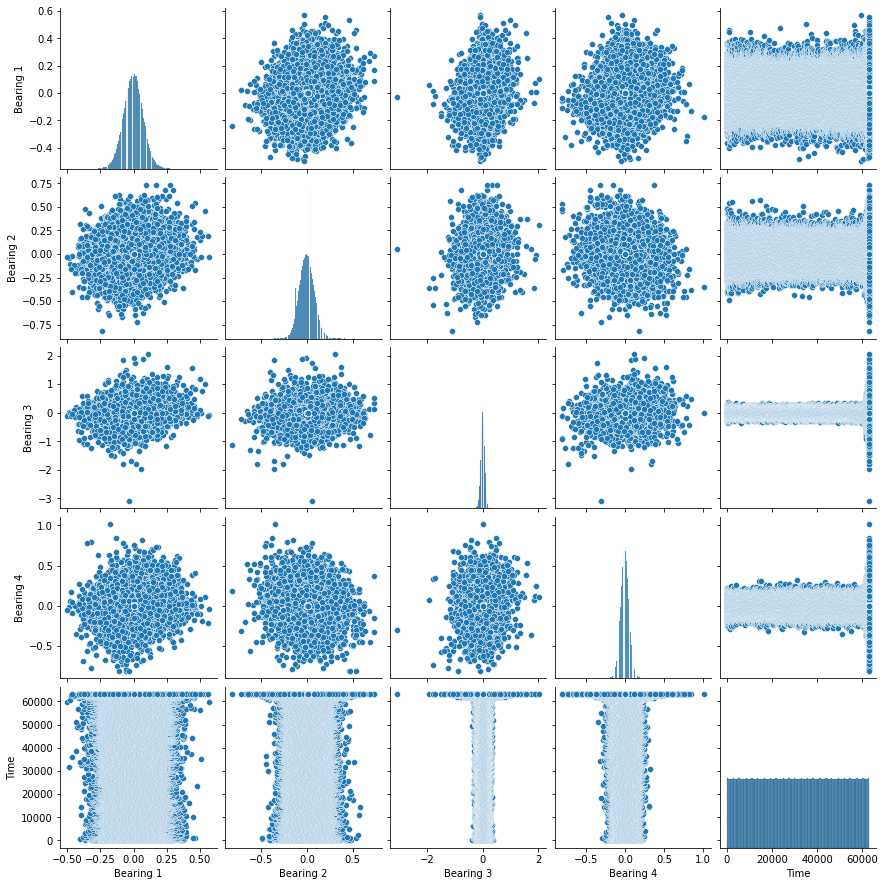

In [21]:
sns.pairplot(data3)
plt.show()